In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Equalização de histograma

Seja $n_k$ o número de pixels na imagem possuindo o $k$-ésimo nível de intensidade (por exemplo, o primeiro nível com valor 0, o segundo com valor 1, e assim por diante), a transformação de equalização de histograma é dada por

\begin{equation}
s_k = T(k) = \frac{L-1}{MN}\sum_{j=0}^{k}n_j
\end{equation}
onde $s_k$ é o $k$-ésimo nível de intensidade após a transformação, $L$ o número de níveis de intensidade na imagem e $N$ e $M$ o número de linhas e colunas da imagem.

In [4]:
def histogram_equalization(img):
  
  bins = range(0, 257) 
  # Calcula quantos pixels possuem cada nível de intensidade
  hist, _ = np.histogram(img, bins)
  
  # Calcula a transformação para cada nível de intensidade
  mn = sum(hist) # num_cols * num_rows
  c = 255./mn # O valor de (L-1)/MN
  out_intesity = np.zeros(256)
  for k in range(256):
    soma = 0
    for j in range(0, k+1):
      soma += hist[j]
    out_intesity[k] = c * soma
  
  # Aplica a transformação
  img_eq = np.zeros(img.shape)
  num_rows, num_cols = img.shape
  for row in range(num_rows):
    for col in range(num_cols):
      img_eq[row, col] = out_intesity[img[row, col]]
      
  return img_eq  

Text(0, 0.5, 'Number of pixels')

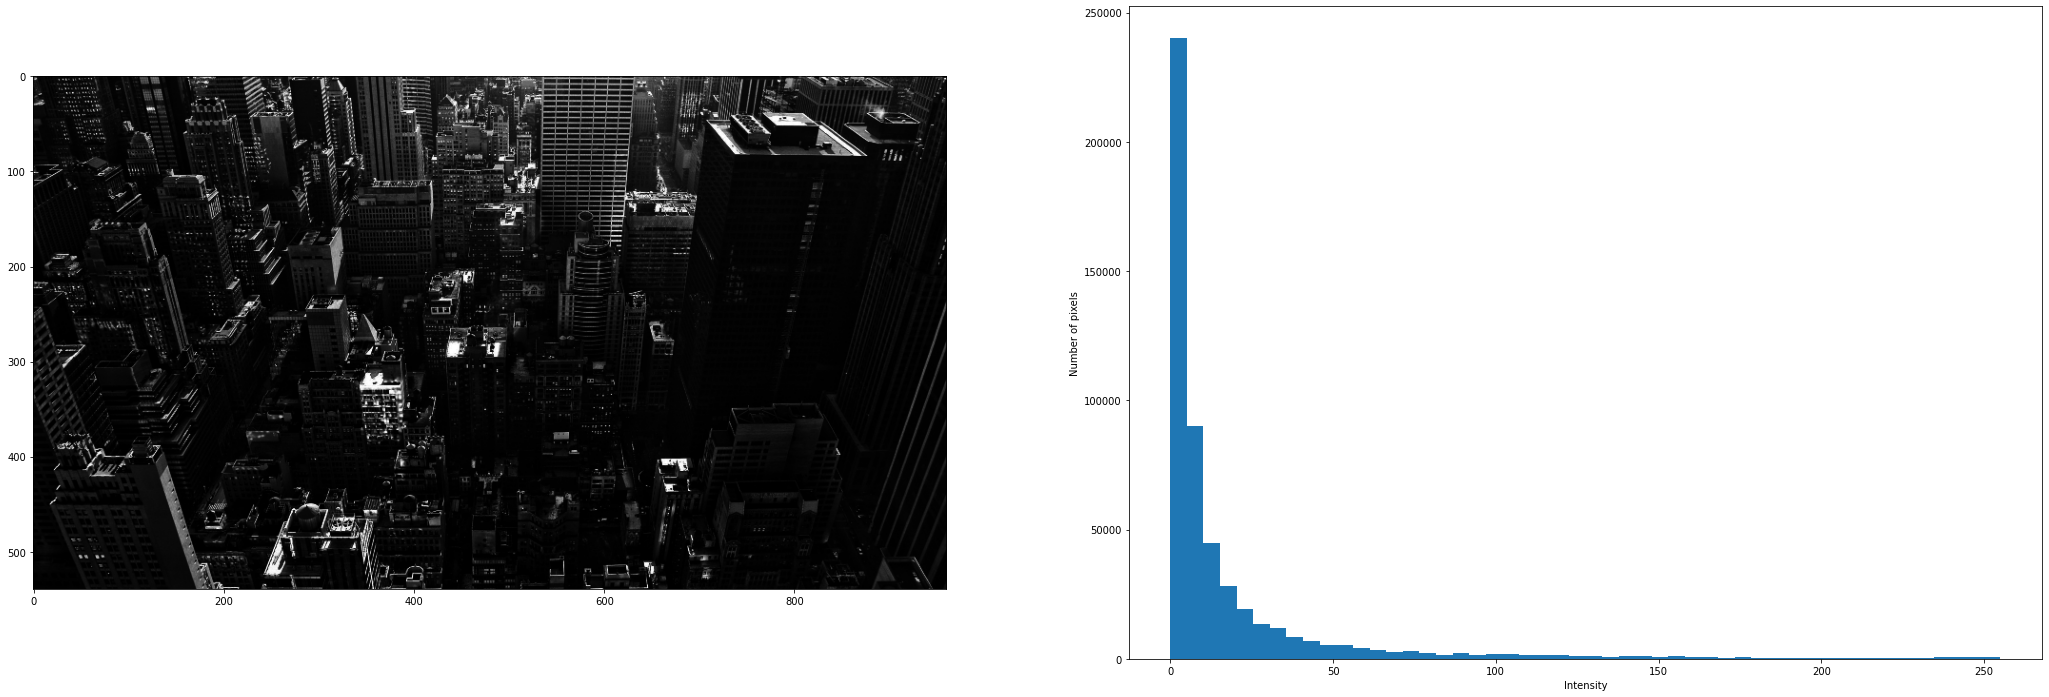

In [5]:
img = plt.imread('Imgs/city_dark.tiff')

plt.figure(figsize = (36, 12))
plt.subplot(1, 2, 1) # linha de plots, colunas de plot, index do plot
plt.imshow(img, 'gray')
plt.subplot(1, 2, 2)
_ = plt.hist(img.flatten(), 50)
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')

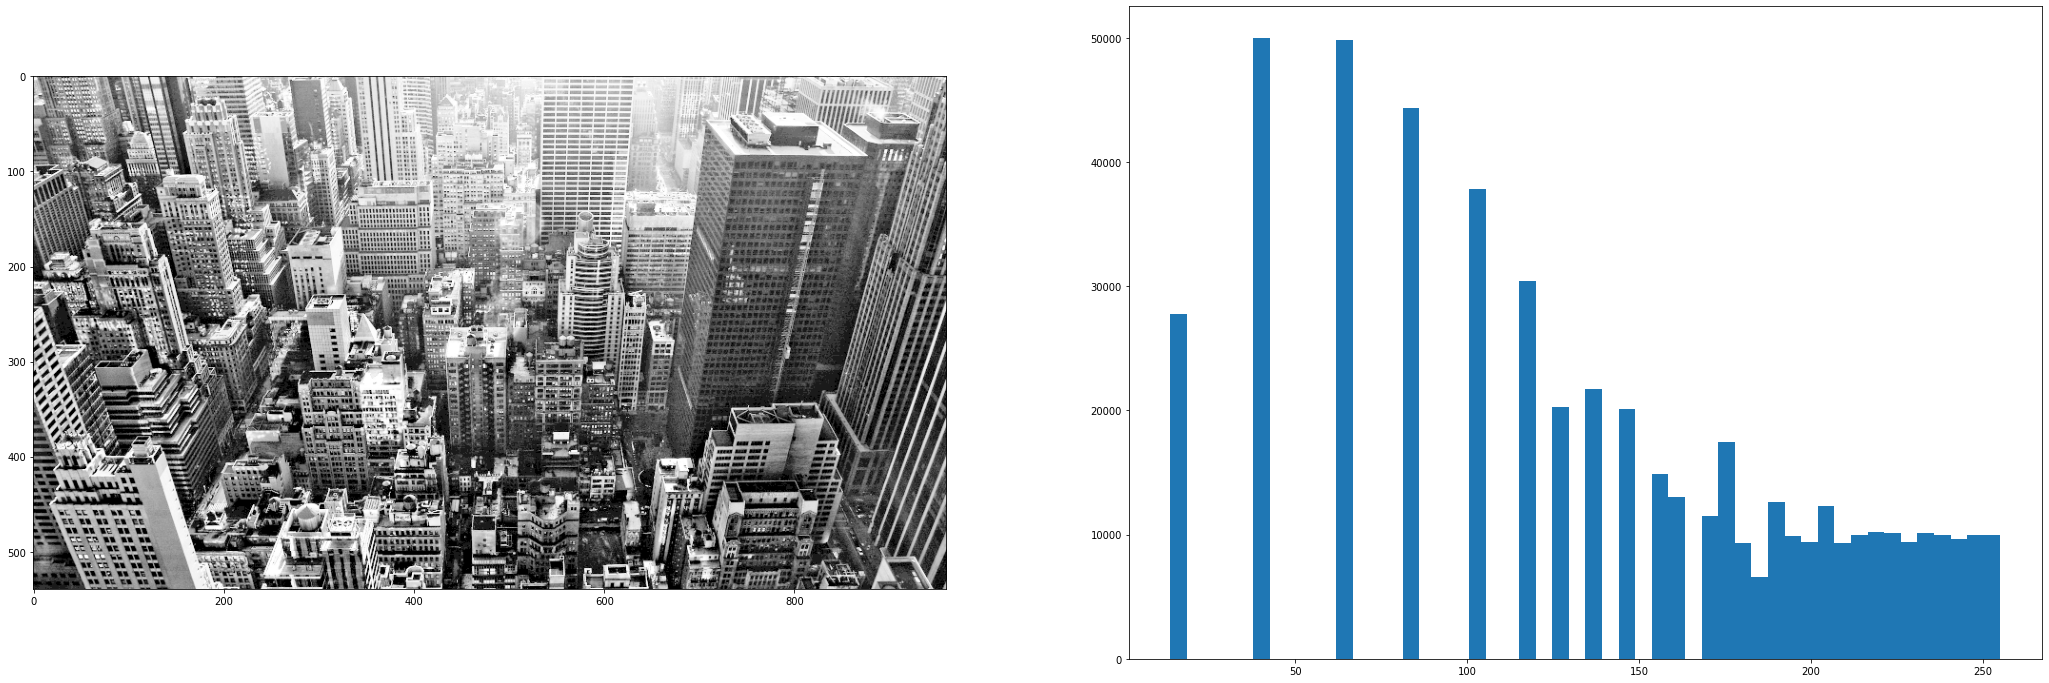

In [6]:
img_eq = histogram_equalization(img)
plt.figure(figsize = (36, 12))
plt.subplot(1, 2, 1) # linha de plots, colunas de plot, index do plot
plt.imshow(img_eq, 'gray')
plt.subplot(1, 2, 2)
_ = plt.hist(img_eq.flatten(), 50)
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
